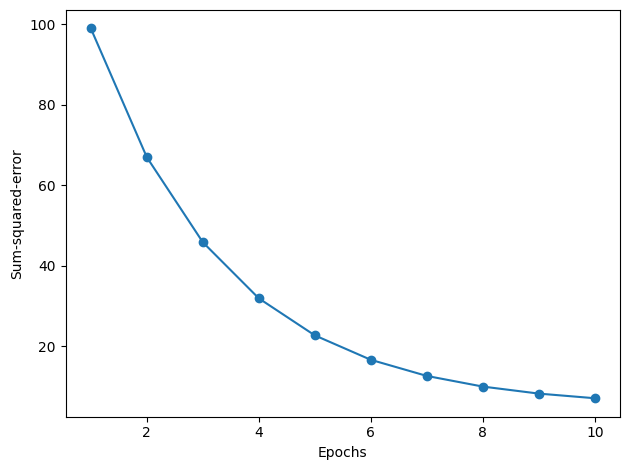

In [16]:
#Main thing is that Gradient Descent works better when input Matrix is in a standardized format
#Retraining the model with same iris data but after standardization
#Standardization:
#1. Subtract mean of all datapoints from each of them (centers them at 0)
#2. Divide all of them with standard deviation (so deviation has become 1)
#Standardization is more like converting all currencies to USD before comparing them.
#In our case, so that no feature has extra influence just because of its magnitude
#Converges even with a smaller learning rate compared to the learning rate needed for the original input Matrix
#Makes training more resource efficient

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

#ADAptive LInear NEuron-Gradient Descent:
class AdalineGD (object):
  def __init__(self, learningRate, visitCounts, randomSeed):
    self.learningRate = learningRate
    self.visitCounts = visitCounts
    self.randomSeed = randomSeed

  def training(self, inputMatrix, classLabels):
    np.random.seed(self.randomSeed)

    self.weights_ = []

    for i in range(len(inputMatrix[0])+1):
      self.weights_.append(np.random.rand()*0.01)

    self.weights_ = np.array(self.weights_)

    self.costs_ = []

    for _ in range(self.visitCounts):
      zs = self.net_input(inputMatrix)
      outputs = self.activation(zs)
      errors = classLabels - outputs
      self.weights_[1:] += (self.learningRate * inputMatrix.T.dot(errors))
      self.weights_[0] += self.learningRate * errors.sum()

      cost = (errors ** 2).sum()
      self.costs_.append(cost)

    return self

  def net_input(self, inputMatrix):
    return np.dot(inputMatrix, self.weights_[1:]) + self.weights_[0]

  def activation(self, inputMatrix):
    return inputMatrix #For now, just a placeholder. But it can twist things completely.


s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

df = pd.read_csv(s, header=None, encoding='utf-8')

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

#Standardizing:
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

#Now using learningRate of 0.01 to see results:
ada_gd = AdalineGD(0.01, 10, 1).training(X_std, y)

plt.plot(range(1, len(ada_gd.costs_) + 1),
ada_gd.costs_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

#From the graph, we see that the algorithm, while working with standardized data, is converging smoothly even with lower learning rate (0.01 vs 0.001)
#N.B.: learning rate 0.01 is lower than learning rate 0.0001